In [1]:
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline
import scipy.stats as si
import scipy

### THESE ARE THE FUNCTIONS OF THE CODE:
b) a) i)Annualize Vol from Hourly Data

b) a) ii)Annualize Vol from Daily Data

b) a) iii)Annualize Vol from Daily Data  with Sampling at Specific Time of Day 







### a) Read Time Series and Sets it to DataFrame

##### Load Up 10 Yr Bund Data

In [25]:
data=pd.read_csv('BUND_YIELD.csv',index_col=0) 
data.head(13)

,Hour,Price
Date,,
21-Feb-17,1.0,6.850
21-Feb-17,2.0,6.872
21-Feb-17,3.0,6.872
21-Feb-17,4.0,6.879
21-Feb-17,5.0,6.958
21-Feb-17,6.0,6.984
21-Feb-17,7.0,6.987
21-Feb-17,8.0,6.982
21-Feb-17,9.0,7.000


Text(0.5, 1.0, '10 Year Bund Yield')

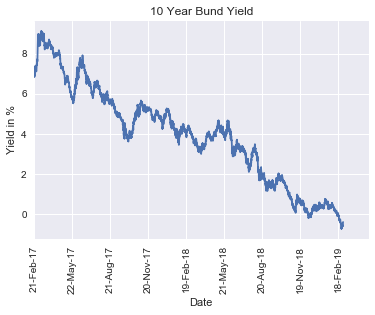

In [75]:
ax=data['Price'].plot(rot=90)
plt.xlabel('Date')
plt.ylabel('Yield in %') 
plt.title('10 Year Bund Yield')

### b) a)

Annual Vol= sqrt(DAILY variance)*sqrt(# Trading Days in a Year)

Hourly Vol=sqrt(HOURLY variance)*sqrt(# Trading Hours in a Year)

Number of Trading Days in a Yar=252

Number of Trading Hours in a Year=252 Days * 11 Hours= 2,772 Hours


#### b) a) i)Annualize Vol from Hourly Data

In [46]:
#Code to Annualize Vol from Hourly Data
def Hourly_Vol(frequency):
    Sample=data['Price'][frequency-1::frequency] #Creates New Sampling list based on frequency input
    Variance=Sample.var()    #Calculates Variance of New Sample
    Annual_Vol=np.sqrt(Variance)*np.sqrt(2772/frequency) # Annualizes Vol
    
    return Annual_Vol
    

In [47]:
#Annual vol considering hourly data, sampling every 4 hours
Hourly_Vol(4)

63.8025613841181

#### b) a) ii)Annualize Vol from Daily Data

In [48]:
def Daily_Vol(frequency):
    Original_DAILY_Sample=data['Price'][10::11] #Grabs the Hourly Data and Converts it into Daily Data 
    NEW_Sample=Original_DAILY_Sample[frequency-1::frequency] #Creates New Sampling list based on frequency input
    Variance=NEW_Sample.var()    #Calculates Variance of New Sample
    Annual_Vol=np.sqrt(Variance)*np.sqrt(252/frequency) #Annualizes Vol
    
    return Annual_Vol

In [49]:
#Annual vol considering daily data, sampling every 3 days
Daily_Vol(3)

22.183408749916083

#### b) a) iii)Annualize Vol from Daily Data  with Sampling at Specific Time of Day 

In [50]:
#inputs are: frequency of sampling(in days) AND sampling time of the day
#Assuming 11 trading hours a week
#sampling_time= the 'i'th hour of the trading day in which the data is sampled
def Daily_Vol_Specific_Hour(frequency,sampling_time):    
    Original_DAILY_Sample=data['Price'][sampling_time-1::11] #Grabs the Hourly Data and Converts it into Daily Data 
    NEW_Sample=Original_DAILY_Sample[frequency-1::frequency] #Creates New Sampling list based on frequency input
    Variance=NEW_Sample.var()    #Calculates Variance of New Sample
    Annual_Vol=np.sqrt(Variance)*np.sqrt(252/frequency) #Annualizes Vol
    
    return Annual_Vol

In [52]:
#Annual vol considering DAILY data sampled on the 6th trading hour of the day
Daily_Vol_Specific_Hour(1,6)

38.503044673899524

In [53]:
#Annual vol considering data sampled every other day, on the 8th trading hour of the day
Daily_Vol_Specific_Hour(2,8)

27.22303387744608

### b) b) Space Increment Sampling Considering |Δ in bp| ≥ X bp

In [59]:
def Space_Increment_Vol(increment_in_bp):
    Increment_Sample=[] #Create a List for the samples
    Increment_Sample.append(data['Price'][0]) #Add the first data point in our data

    Index_List=[1] #Create a list for the index of the samples

    #Loop to add the element in the list ONLY if its value is more than 5 bp away from last sample
    counter=0
    for i in data['Price']:
        counter+=1
        if abs(i-np.array(Increment_Sample[-1:]))>=(increment_in_bp/100):
            Increment_Sample.append(i)
            Index_List.append(counter)
        else:
            continue
    #CHECK THIS PART!!!!!!!!!!!!!!!!!!!  
    #Calculate the average distance (in hours) between each samples
    dt=np.array([x - Index_List[i - 1] for i, x in enumerate(Index_List)][1:]).mean()
    
    # Calculate Variance of the Sample
    np.array(Increment_Sample).var()
    
    #Calculate Annualized Vol based on average distance (in hours) between samples
    Annual_Vol=np.sqrt(np.array(Increment_Sample).var())*np.sqrt(2772/dt) #CHECK!
    
    return Annual_Vol

In [60]:
#Variance sampling only moves ≥ 5bp from last Sampled Point
#Annualized vol based on conditional absolute size move (5bp) sampling
Space_Increment_Vol(5)

C:\Users\andyg\Miniconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater_equal
  # This is added back by InteractiveShellApp.init_path()


61.29566761302855

#### c) a) i)Derived Time Series from Hourly Data

In [63]:
def Hourly_Derived_Time_Series(frequency):
    Sample=data['Price'][frequency-1::frequency] #Creates New Sampling list based on frequency input
    
    return pd.DataFrame(Sample)

In [64]:
#Derived hourly time series, sampling every 7th hour
Hourly_Derived_Time_Series(7).head()

,Price
Date,
21-Feb-17,6.987
22-Feb-17,6.912
22-Feb-17,6.981
23-Feb-17,6.949
24-Feb-17,7.233


#### c) a) ii)Derived Time Series from Daily Data

In [65]:
def Daily_Derived_Time_Series(frequency):
    Original_DAILY_Sample=data['Price'][10::11] #Grabs the Hourly Data and Converts it into Daily Data 
    NEW_Sample=Original_DAILY_Sample[frequency-1::frequency] #Creates New Sampling list based on frequency input
    
    return pd.DataFrame(NEW_Sample)

In [66]:
#Derived daily time series, sampling every 5th day
Daily_Derived_Time_Series(5).head()

,Price
Date,
25-Feb-17,7.187
2-Mar-17,8.930
7-Mar-17,8.436
12-Mar-17,9.026
17-Mar-17,8.615


#### c) a) iii)Derived Time Series from Daily Data with Sampling at Specific Time of Day

In [67]:
def Daily_Derived_Time_Series_Specific_Hour(frequency,sampling_time):    
    Original_DAILY_Sample=data['Price'][sampling_time-1::11] #Grabs the Hourly Data and Converts it into Daily Data 
    NEW_Sample=Original_DAILY_Sample[frequency-1::frequency] #Creates New Sampling list based on frequency input
    
    return pd.DataFrame(NEW_Sample)

In [68]:
#Derived daily time series, sampling every 5th day, on the 8th trading hour of the day
Daily_Derived_Time_Series_Specific_Hour(5,8).head()

,Price
Date,
25-Feb-17,7.281
2-Mar-17,8.509
7-Mar-17,8.796
12-Mar-17,8.957
17-Mar-17,8.751


#### c) b) Derived Time Series from Space Increment Sampling Considering |Δ in bp| ≥ X bp

In [71]:
def Space_Increment_Time_Series(increment_in_bp):
    Increment_Sample=[] #Create a List for the samples
    Increment_Sample.append(data['Price'][0]) #Add the first data point in our data

    Index_List=[1] #Create a list for the index of the samples

    #Loop to add the element in the list ONLY if its value is more than 5 bp away from last sample
    for i in data['Price']:
        if abs(i-np.array(Increment_Sample[-1:]))>=(increment_in_bp/100):
            Increment_Sample.append(i)
            
        else:
            continue
    
    return pd.DataFrame(Increment_Sample)

In [72]:
#Derived time series, sampling only moves ≥ 5bp from last Sampled Point
Space_Increment_Time_Series(5).head()

C:\Users\andyg\Miniconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':


,0
0,6.850
1,6.958
2,7.042
3,6.848
4,7.021


### d) Running Annualized Vol

Text(0.5, 1.0, 'Rolling 1 Hour Variance with window size of 200 hours')

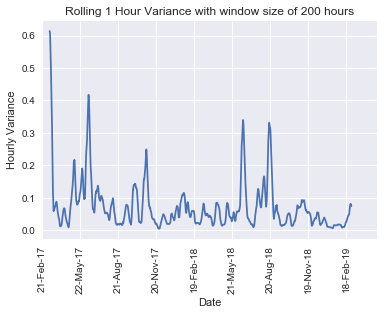

In [84]:
#Rolling 1 Hour Variance with window size of 200 hours(data points)
data['Price'].rolling(200).var().plot(rot=90)
plt.xlabel('Date')
plt.ylabel('Hourly Variance') 
plt.title('Rolling 1 Hour Variance with window size of 200 hours')

Text(0.5, 1.0, 'Rolling Annual Vol for 1 Hour Data with window size=200')

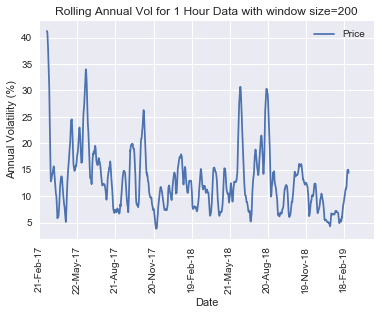

In [90]:
#Rolling Annual Vol for 1 Hour with running window size=200
pd.DataFrame(np.sqrt(data['Price'].rolling(200).var())*np.sqrt(2772)).plot(rot=90)
plt.xlabel('Date')
plt.ylabel('Annual Volatility (%)') 
plt.title('Rolling Annual Vol for 1 Hour Data with window size=200')

#### d)i) Running Annualized Vol with Hourly Samples

In [116]:
def Running_Annual_Vol_with_Hourly_Samples(frequency,window):
    Sample=data['Price'][frequency-1::frequency] #Creates New Sampling list based on frequency input
    Running_Variance=Sample.rolling(window).var() #Calculates hourly running variance based on 'window size' input
    Running_Annual_Vol=np.sqrt(Running_Variance)*np.sqrt(2772/frequency)
    
    return pd.DataFrame(Running_Annual_Vol)

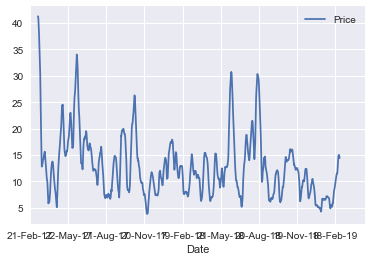

In [118]:
#Running Annual Vol, Sampling every Hour and with window size of 200 hours
Running_Annual_Vol_with_Hourly_Samples(1,200).plot()

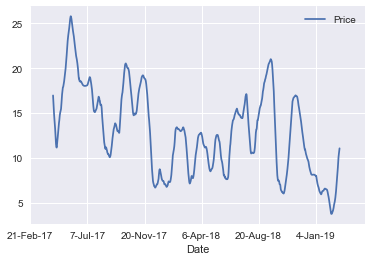

In [92]:
#Running Annual Vol, Sampling every 3 Hours and with window size of 200 
Running_Annual_Vol_with_Hourly_Samples(3,200).plot()

#### d)ii) Running Annualized Vol with Daily Samples

In [95]:
def Running_Annual_Vol_with_Daily_Samples(frequency,window):
    Original_DAILY_Sample=data['Price'][10::11] #Grabs the Hourly Data and Converts it into Daily Data 
    NEW_Sample=Original_DAILY_Sample[frequency-1::frequency] #Creates New Sampling list based on frequency input    
    Running_Variance=NEW_Sample.rolling(window).var() #Calculates daily running variance based on 'window size' input
    Running_Annual_Vol=np.sqrt(Running_Variance)*np.sqrt(252/frequency) 
    
    return pd.DataFrame(Running_Annual_Vol)

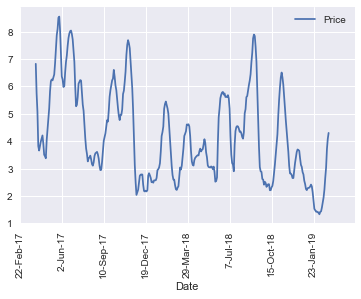

In [98]:
#Running Annual Vol, Sampling every 2 Days and with window size of 200 days 
Running_Annual_Vol_with_Daily_Samples(2,20).plot(rot=90)

#### d)iii) Running Annualized Vol with Daily Samples at Specific Time of Day

In [99]:
def Running_Annual_Vol_with_Daily_Samples_on_Specific_Time_of_Day(frequency,sampling_time,window):
    Original_DAILY_Sample=data['Price'][sampling_time-1::11] #Grabs the Hourly Data and Converts it into Daily Data    
    NEW_Sample=Original_DAILY_Sample[frequency-1::frequency] #Creates New Sampling list based on frequency input       
    Running_Variance=NEW_Sample.rolling(window).var() #Calculates daily running variance based on 'window size' input
    Running_Annual_Vol=np.sqrt(Running_Variance)*np.sqrt(252/frequency) 
    
    return pd.DataFrame(Running_Annual_Vol)

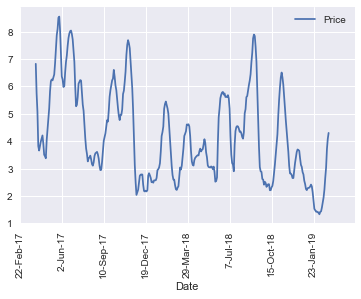

In [101]:
#Running Annual Vol Sampling every 2 days on the 11th trading hour of the day, with window size=20
Running_Annual_Vol_with_Daily_Samples_on_Specific_Time_of_Day(2,11,20).plot(rot=90)

### e) Plotting c and d on the same graph

#### e)i)

In [142]:
def Running_Annual_Vol_with_Hourly_Samples(frequency,window):
    Sample=data['Price'][frequency-1::frequency] #Creates New Sampling list based on frequency input
    Running_Variance=Sample.rolling(window).var() #Calculates hourly running variance based on 'window size' input
    Running_Annual_Vol=np.sqrt(Running_Variance)*np.sqrt(2772/frequency)
    
    #Place Running Vols and Time Series in DataFrame
    DF=pd.DataFrame(Sample)
    DF['Running_Vol']=Running_Annual_Vol
    
    return DF

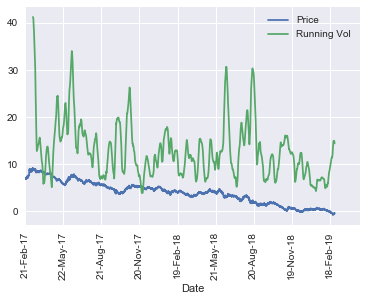

In [137]:
#Running Annual Vol, Sampling every Hour and with window size of 200 hours
Running_Annual_Vol_with_Hourly_Samples(1,200).plot(rot=90)

In [143]:
plt.figure()

DF=Running_Annual_Vol_with_Hourly_Samples(1,200)

#In [19]: df.A.plot()

#In [20]: df.B.plot(secondary_y=True, style='g')
DF.head()

,Price,Running_Vol
Date,,
21-Feb-17,6.850,NaN
21-Feb-17,6.872,NaN
21-Feb-17,6.872,NaN
21-Feb-17,6.879,NaN
21-Feb-17,6.958,NaN


<Figure size 432x288 with 0 Axes>

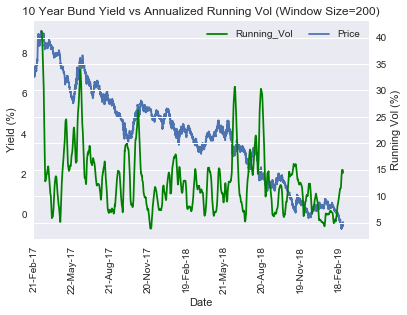

In [174]:
DF.Price.plot()
plt.legend()
plt.ylabel('Yield (%)')
DF.Running_Vol.plot(secondary_y=True, style='g',rot=90)
plt.xlabel('Date')
plt.ylabel('Running Vol (%)') 
plt.title('10 Year Bund Yield vs Annualized Running Vol (Window Size=200)')
plt.legend(bbox_to_anchor=(0.8, 1))

In [ ]:
#could create 1 function ONLY for daily based on 1-frequency and 2-time of day sampling